# K-Means Clustering

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [4]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:,[3,4]].values # We need to take all the attributes. But taking only 3,4 for visualization purposes.
# Remember iloc [rows,columns]; : means a range.

## Using the elbow method to find the optimal number of clusters

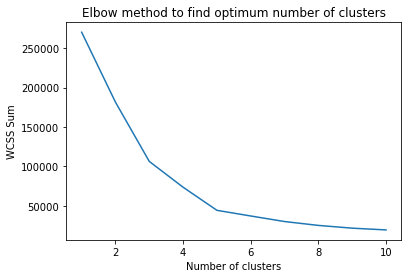

In [6]:
from sklearn.cluster import KMeans
wcss_sums = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    # k-means++ for better random init.
    kmeans.fit(X)
    wcss_sums.append(kmeans.inertia_)

plt.plot(range(1,11),wcss_sums)
plt.title("Elbow method to find optimum number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS Sum")
plt.show()

## Training the K-Means model on the dataset

In [15]:
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
dependent_variable = kmeans.fit_predict(X)
print(dependent_variable)
# Customer id i is allotted to Cluster number x out of (0-4) (5 clusters)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 2 3 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 5 6 5 6 5
 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6]


## Visualising the clusters

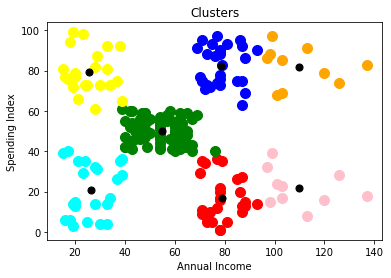

In [18]:
colors = {"0":"red","1":"blue","2":"green","3":"cyan","4":"yellow","5":"pink","6":"orange"}
for i in range(0,7):
    # Select those x axis rows where val=ith cluster
    plt.scatter(X[dependent_variable == i, 0],X[dependent_variable == i, 1], s = 100, c = colors[str(i)], label = f"Cluster {i+1}")

plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], s = 50, c= "black", label = "Centroids")

plt.title("Clusters")
plt.xlabel("Annual Income")
plt.ylabel("Spending Index")
# plt.legend()
plt.show()